## We have measures of air pollution. Basis that, we will cluster states in India. 

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir(r'C:\Users\solharsh\Desktop\Data Science\Machine Learning\Jigsaw\Agglomerate Clustering\Data - Agglomerative Clustering\Data - Agglomerative Clustering')

In [4]:
data = pd.read_csv("Pollution_India_2010.csv",na_values='Null')

In [5]:
data.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9.0,39.0,4.0,Andhra Pradesh
1,Guntur,11.0,81.0,2.0,Andhra Pradesh
2,Hydrabad,24.0,79.0,5.0,Andhra Pradesh
3,Kothagudem,11.0,62.0,2.0,Andhra Pradesh
4,Kurnool,9.0,85.0,4.0,Andhra Pradesh


In [6]:
data.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [7]:
data.shape

(181, 5)

In [8]:
data=data.dropna()

In [9]:
data.shape

(175, 5)

In [10]:
data.dtypes

City      object
NO2      float64
PM10     float64
SO2      float64
State     object
dtype: object

In [12]:
data_pol = data.groupby('State',as_index=False)[['NO2','PM10','SO2']].agg(np.sum)

In [13]:
data_pol.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,183.0,893.0,60.0
1,Assam,177.0,834.0,74.0
2,Bihar,40.0,181.0,7.0
3,Chandigarh,16.0,92.0,2.0
4,Chattisgarh,86.0,502.0,37.0


In [14]:
def scale(x):
    return(x-np.mean(x)/np.std(x))
data_num = data_pol.drop("State",axis=1)
data_scaled = data_num.apply(scale,axis=1)

In [15]:
data_scaled.head()

,NO2,PM10,SO2
0,181.968601,891.968601,58.968601
1,175.925615,832.925615,72.925615
2,38.992825,179.992825,5.992825
3,15.072712,91.072712,1.072712
4,85.001350,501.001350,36.001350


In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
data_scaled = np.array(data_scaled) # to work with scipy need to convert it into array

In [20]:
Z=linkage(data_scaled,method="ward") #linkage builds the hierarchical clustering model

In [21]:
#ward - one of the ways of calculating distances 

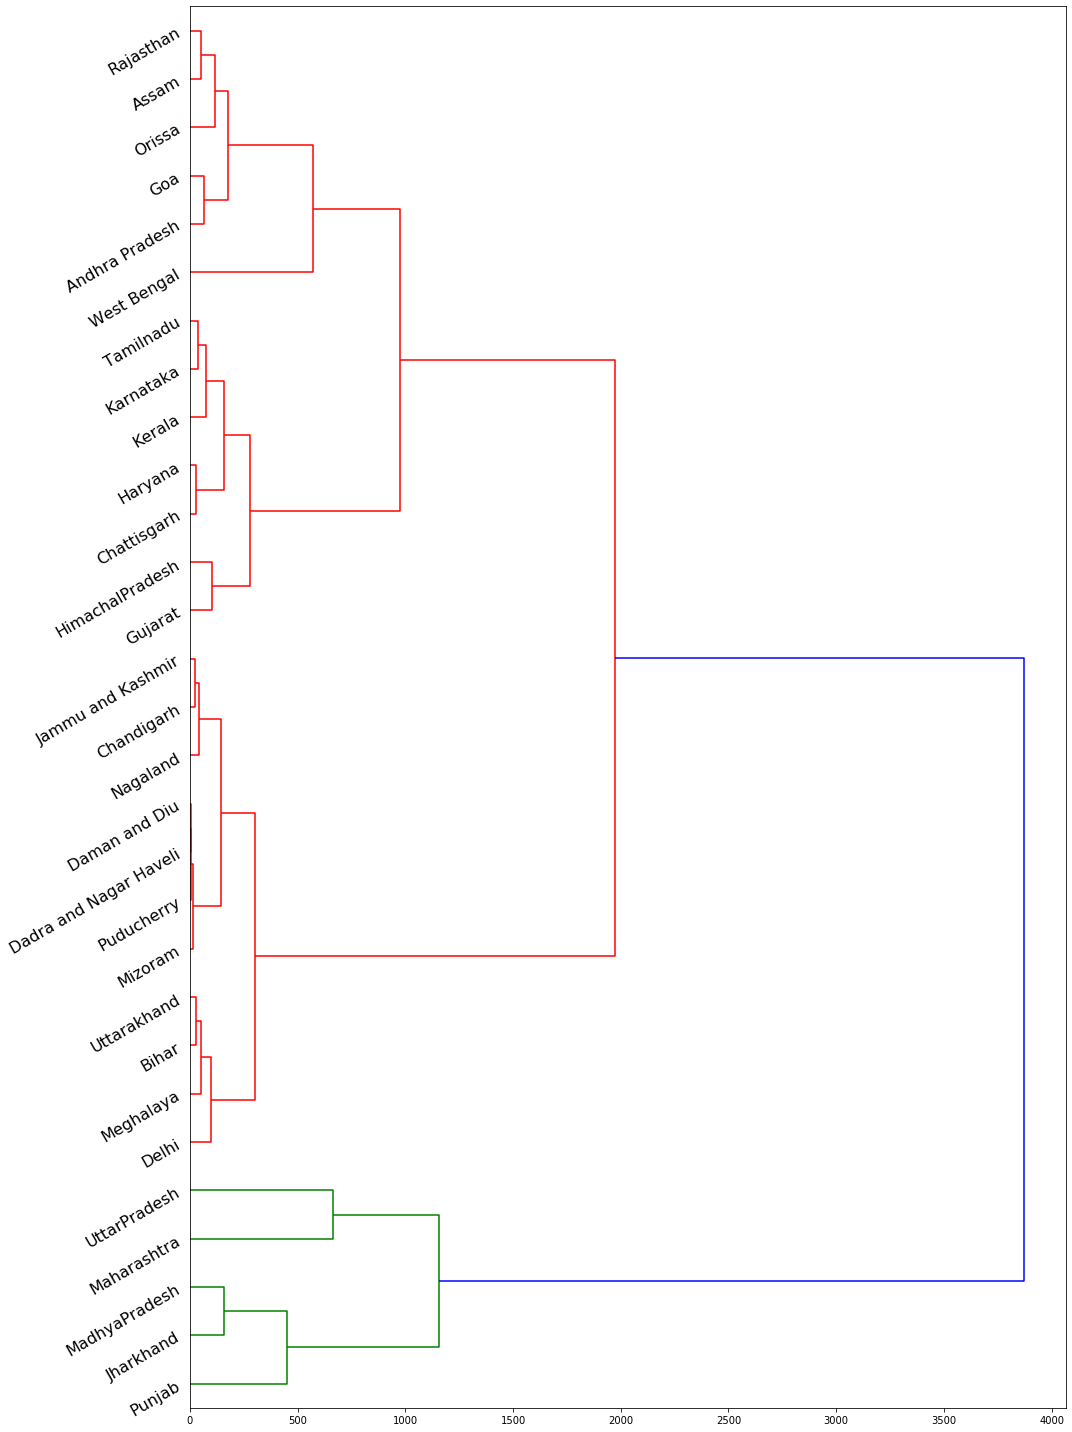

In [23]:
fig, ax = plt.subplots(figsize=(15,20))
ax = dendrogram(Z,orientation="right",labels=np.array(data_pol['State']),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()